## Load the json files ofr RCP85 and RCP45, 2050 and 2100

In [1]:
library(rjson)
library("IRdisplay")

Warning message:
“package ‘rjson’ was built under R version 3.6.3”
Warning message:
“package ‘IRdisplay’ was built under R version 3.6.3”


In [2]:
"coastal_plot"=function(res, title, ylab='FALSE', mar=c(3,4,2,0), do_ylab='TRUE', do_xlab='TRUE'){

    # RCP85-RCP45
    general_cex = 1.3
    pcex=1.6
    lwdp = 4
    lwd = 6

    color_rcp45='dodgerblue2'
    color_rcp85='firebrick2'

    color = 'dodgerblue2'
    
    par(cex=general_cex)
    par(mar=mar)
    ylim=c(-600,300)
    
    xval = 1:5
    plot(xval, rep(0,length(xval)), type='l', lwd=2, 
         ylim=ylim, xlab='', ylab='', xaxt='n', yaxt='n', yaxs='i', xaxs='i')
    for (yval in seq(-600,200,by=200)){
        if (yval!=0){
            lines(xval, rep(yval,length(xval)), type='l', lty=2)
        }
    }
    lines(c(3,3), ylim, type='l', lwd=5, col='gray')
    # -- X axis
    axis(1, at=c(2,4), labels=c('',''), font=2)
    if (do_xlab=='TRUE'){
        par(cex=2.7)
        axis(1, at=c(2,4), tick='FALSE', labels=c('mid-','long-'), font=1, line=0.5)
        axis(1, at=c(2,4), tick='FALSE', labels=c('term','term'), font=1, line=2.3)
        par(cex=general_cex)
    }#end
    
    # -- Y axis
    par(cex=2.4)
    axis(2, at=seq(-600,200,200), labels = c('','','','',''), font=2, las=1)
    if (do_ylab=='TRUE'){ axis(2, at=seq(-600,200,200), font=1, las=1, tick='FALSE', line=-0.4) }
    par(cex=general_cex)
    
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)#, adj=0)
    if (ylab=='TRUE'){ mtext("Meters",2, font=2, cex=1.5, line=2.5) }
    
    xmid = 2
    xlong = 4
    xadj = 0.15

    resname = 'RCP85_mid'
    color = color_rcp85
    lines(c(xmid+xadj, xmid+xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xmid+xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

    resname = 'RCP45_mid'
    color = color_rcp45
    lines(c(xmid-xadj, xmid-xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xmid-xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

    resname = 'RCP85_late'
    color = color_rcp85
    lines(c(xlong+xadj, xlong+xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xlong+xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

    resname = 'RCP45_late'
    color = color_rcp45
    lines(c(xlong-xadj, xlong-xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xlong-xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

}


"legend_coastal_plot"=function(){

    # RCP85-RCP45
    general_cex = 1.6
    pcex=1.6
    lwdp = 4
    lwd = 6

    color='dodgerblue2'
    color_rcp45='dodgerblue2'
    color_rcp85='firebrick2'
    
    par(cex=general_cex)
    par(mar=c(0.1,0,2,0))
    ylim=c(-1000,600)
    xval = 1:5
    plot(xval, rep(0,length(xval)), type='l', col='white', #bty="n",
         lty=2, lwd=2, ylim=ylim, xlab='', ylab='', xaxt='n', yaxt='n', xaxs='i')
    
    # -- Title
    par(cex=1.3)
    text(1.075,360, "Legend", font=2, cex=2, adj=0)
    par(cex=general_cex)

    # -- p5/median/p95
    ymedian = -150
    yhalflen = 400
    xmedian = 1.9
    xtextadj = 0.1
    lines(c(xmedian, xmedian), c(ymedian-yhalflen,ymedian+yhalflen), type='l', lwd=lwd, col='black')
    par(cex=general_cex+0.4)
    points(xmedian, ymedian, pch=16, col='black', cex=pcex, lwd=lwdp)
    text(xmedian+xtextadj, ymedian+yhalflen+50, expression(paste(95^th,"p")),adj=0, cex=1.2)
    text(xmedian+xtextadj, ymedian, "median",adj=0, cex=1.2)
    text(xmedian+xtextadj, ymedian-yhalflen-50, expression(paste(5^th,"p")),adj=0, cex=1.2)
    par(cex=general_cex)
    
    
    # -- CMIP5 - RCP85
    color = color_rcp85
    xrcp85 = 2.7
    lenline = 0.4
    yrcp85 = 100
    lines(c(xrcp85, xrcp85+lenline), c(yrcp85,yrcp85), type='l', lwd=lwdp, col=color)
    points(xrcp85+(lenline/2), yrcp85, pch=16, col=color, lwd=lwdp, cex=pcex)
    text(xrcp85+lenline*1.2, yrcp85, "CMIP5 RCP8.5",adj=0, font=2, cex=1.7)
    
    # -- CMIP5 - RCP45
    color = color_rcp45
    xrcp45 = 2.7
    yrcp45 = -400
    lines(c(xrcp45, xrcp45+lenline), c(yrcp45,yrcp45), type='l', lwd=lwd, col=color)
    points(xrcp45+(lenline/2), yrcp45, pch=16, col=color, lwd=lwdp, cex=pcex)
    text(xrcp45+lenline*1.2, yrcp45, "CMIP5 RCP4.5",adj=0, font=2, cex=1.7)
    

}

In [10]:
region = 'Australasia'

res = list()

subregions = c('NAU','CAU','EAU','SAU','NZ')
for (scenario in c('RCP85','RCP45')){
    for (horizon in c('2050','2100')){
        json_file = paste('/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_',scenario,'_',horizon,'.json',sep='')
        if (horizon=='2050'){term='mid'}
        if (horizon=='2100'){term='late'}
        wname = paste(scenario,term,sep='_')
        res[[wname]] = list()
        
        json_data <- fromJSON(paste(readLines(json_file), collapse=""))
        for (subregion in subregions){
            res[[wname]][[subregion]] = c(json_data[[subregion]]$q5, json_data[[subregion]]$median, json_data[[subregion]]$q95)            #}#end if
        }#end subregion
    }#end horizon
}#and scenario


Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP85_2050.json'”
Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP85_2100.json'”
Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP45_2050.json'”
Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP45_2100.json'”


In [11]:
res

$RCP85_mid
$RCP85_mid$NAU
[1] -218.01263  -75.69093   34.66616

$RCP85_mid$CAU
[1] -184.07423  -79.62495  -10.49459

$RCP85_mid$EAU
[1] -163.99771  -58.06038   29.33981

$RCP85_mid$SAU
[1] -130.24453  -42.46538   26.24432

$RCP85_mid$NZ
[1] -91.80328 -45.56004 -11.15606


$RCP85_late
$RCP85_late$NAU
[1] -1230.2373  -218.8156   655.3008

$RCP85_late$CAU
[1] -482.5248 -222.6700 -101.9376

$RCP85_late$EAU
[1] -431.18585 -166.69612  -17.52038

$RCP85_late$SAU
[1] -366.176335 -130.852813   -5.528266

$RCP85_late$NZ
[1] -274.14798 -126.42271  -49.94139


$RCP45_mid
$RCP45_mid$NAU
[1] -167.5654  -64.3219   25.8741

$RCP45_mid$CAU
[1] -131.65545  -68.86471  -20.09913

$RCP45_mid$EAU
[1] -130.84279  -48.96529   21.19232

$RCP45_mid$SAU
[1] -99.21640 -33.68483  22.29808

$RCP45_mid$NZ
[1] -73.81047 -39.21979 -13.12499


$RCP45_late
$RCP45_late$NAU
[1] -996.0677 -150.5046  671.7480

$RCP45_late$CAU
[1] -266.38104 -160.38985  -86.79528

$RCP45_late$EAU
[1] -243.386316 -109.414963   -4.786208

$RCP45_late$SAU
[1] -195.266675  -80.541689    6.322275

$RCP45_late$NZ
[1] -156.22301  -87.68824  -42.81724

png 
  2

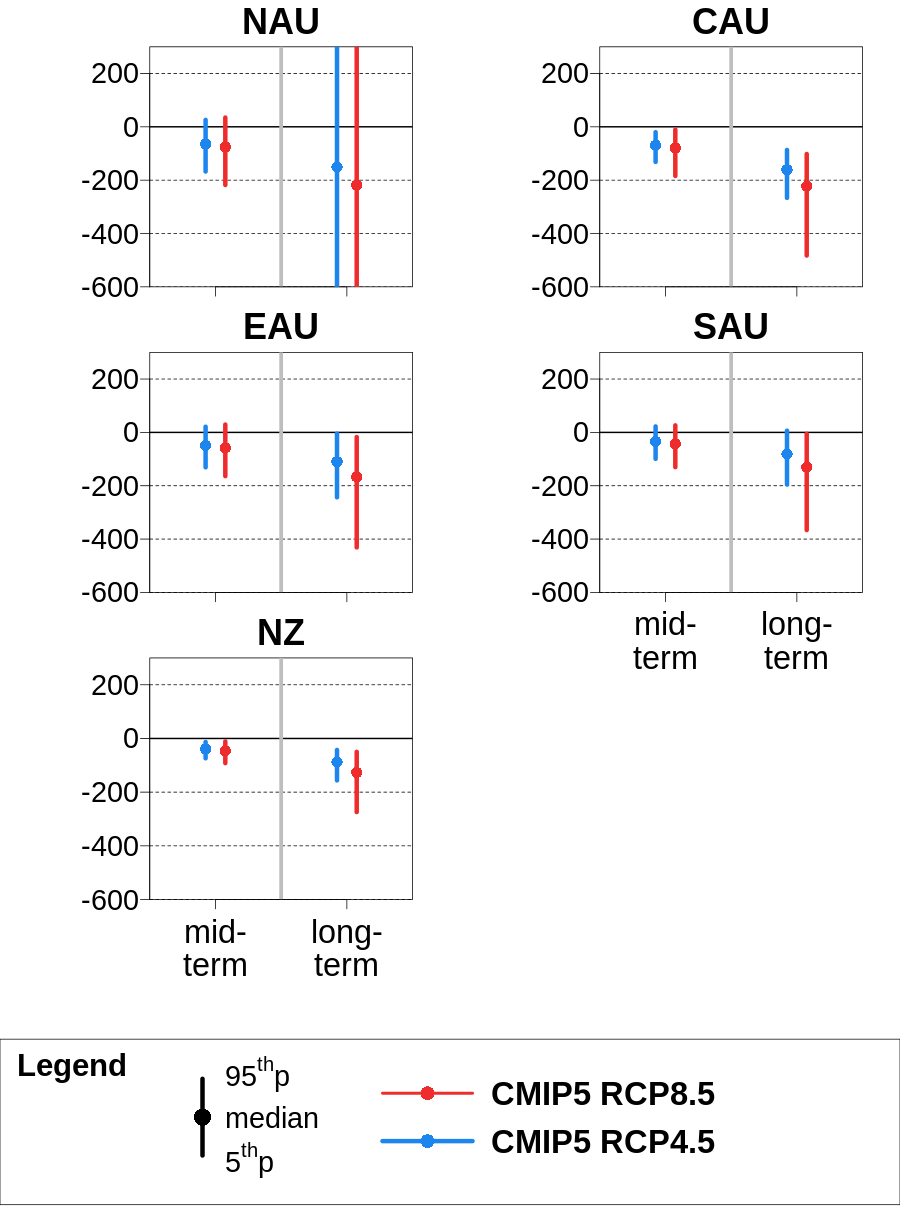

In [12]:
figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.7/panel_d_',region,'_CoastalRecession_boxplot_RCP85_2100.png',sep='')
png(figname, width=900,height=1050*1.15)
mat = t(matrix(1:8,2,4))
mat[4,] = 6
mat[3,2] = 0
layout(mat, heights=c(1,1,1.25,0.7), widths=c(1,1))
for (subregion in names(res[[1]])){
    wres = list()
    for (wname in c('RCP85_mid', 'RCP85_late','RCP45_mid','RCP45_late')){
        wres[[wname]] = res[[wname]][[subregion]]
    }
    mar = c(1,8,2.5,2)
    if (subregion %in% c('NAU','EAU','NZ')){
        do_ylab='TRUE'
        #mar[2]=8
    }else{
        do_ylab='TRUE'
    }#
    if (subregion %in% c('NZ','SAU')){
        do_xlab='TRUE'
        #mar[1] = 5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    if (subregion %in% c('NZ')){mar[1] = 5}
    
    coastal_plot(wres, subregion, mar=mar, do_ylab=do_ylab, do_xlab=do_xlab)
    #}
    
}
legend_coastal_plot()
dev.off()
display_png(file=figname) 

## PDF

In [13]:
figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.7/panel_d_',region,'_CoastalRecession_boxplot_RCP85_2100.pdf',sep='')
pdf(figname, width=9*1.4,height=10.50*1.15*1.4)
mat = t(matrix(1:8,2,4))
mat[4,] = 6
mat[3,2] = 0
layout(mat, heights=c(1,1,1.25,0.7), widths=c(1,1))
for (subregion in names(res[[1]])){
    wres = list()
    for (wname in c('RCP85_mid', 'RCP85_late','RCP45_mid','RCP45_late')){
        wres[[wname]] = res[[wname]][[subregion]]
    }
    mar = c(1,8,2.5,2)
    if (subregion %in% c('NAU','EAU','NZ')){
        do_ylab='TRUE'
        #mar[2]=8
    }else{
        do_ylab='TRUE'
    }#
    if (subregion %in% c('NZ','SAU')){
        do_xlab='TRUE'
        #mar[1] = 5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#
    if (subregion %in% c('NZ')){mar[1] = 5}
    
    coastal_plot(wres, subregion, mar=mar, do_ylab=do_ylab, do_xlab=do_xlab)
    #}
    
}
legend_coastal_plot()
dev.off()


png 
  2